<a href="https://colab.research.google.com/github/All4Nothing/hg-mldl/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

## 점진적인 학습

훈련한 모델에 새로운 데이터에 대해서 조금씩 훈련하는 방식

대표즉으로 **확률적 경사 하강법 Stochastic Gradient Descent** 알고리즘이 있다

### 확률적 경사 하강법

훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금씩 내려간다.  
그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다.  
이런식으로 전체 샘플을 모두 사용할 때까지 계속한다

만족할만한 위치에 도달하지 못할 시 모든 샘플을 다시 채워 넣어 처음부터 다시 시작

**에포크 epoch** 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정

**미니배치 경사 하강법 minibatch gradient descent**  여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식

**배치 경사 하강법 batch gradient descent** 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용  
안정적인 방법이 될 수는 있어도 컴퓨터 자원을 많이 사용하게 됨

### 손실 함수

**손실 함수 loss function**은 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준

비용 함수 cost function은 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 말함

손실 함수는 연속적이어야 한다. 기술적으로 말하면 미분 가능해야 한다

### 로지스틱 손실 함수

'예측'과 '정답(타깃)'을 곱하고 음수로 바꾼 값을 손실 함수로 사용할 수 있음  
샘플의 타깃이 음성 클래스라 0일 경우, 타깃을 양성 클래스처럼 1로 바꾸고, 예측값도 양성 클래스에 대한 예측으로 바꿈(1 - 예측), 음수로 바꿈.

양성 클래스 (타깃 = 1)일 때 손실은 -log(예측 확률) 로 게산

**로지스틱 손실 함수 logistic loss function** 또는 **이진 크로스엔트로피 손실 함수 binary cross-entropy loss function**

다중 분류에서 사용하는 손실 함수를 **크로스엔트로피 손실 함수 cross-entropy loss function**

회귀의 손실 함수는 **평균 제곱 오차(mean squared error)**를 많이 사용. 타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값

## SGDClassifier 

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

사이킷런 확률적 경사 하강법 `SGDClassifier`

In [5]:
from sklearn.linear_model import SGDClassifier

`loss = '손실함수'` `max_iter='수행할 epoch 횟수'`

In [6]:
sc = SGDClassifier(loss='log', max_iter = 10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


ConvergenceWarning 모델이 충분히 수렴하지 않았다. `max_iter` 매개변수의 값을 늘려 주는 것이 좋다

`partial_fit()` 모델을 이어서 훈련할 때 사용하는 메서드

In [7]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

적은 에포크 횟수 동안에 훈련한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높다.  
많은 에포크 횟수 동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성이 높다.

![epoch accuracy curve](https://forum-cdn.knime.com/uploads/default/c03f5837ac919e7152bdb84b2891d5d0e2674dbf)

**조기 종료 early stopping** 과대적합이 시작하기 전에 훈련을 멈추는 것

In [13]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

파이썬의 `_`는 특별한 변수. 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용

In [14]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

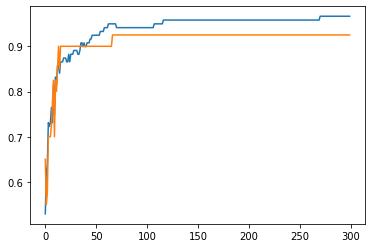

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

100번 째 에포크가 적절한 반복 횟수로 보임

In [16]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDRegressor 확률적 경사 하강법을 사용한 회귀 알고리즘  
사용 방법은 SGDClassifier와 동일하다

SGDClassifier의 loss 매개 변수의 기본값은 'hinge'이다. **힌지 손실 hindge loss**은 **서포트 벡터 머신 support vector machine**이라 불리는 또 다른 머신러닝 알고리즘읠 위한 손실 함수

In [17]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
